In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation
import keras

In [3]:
from sklearn.datasets import load_iris

In [4]:
data=load_iris()

In [10]:
X=data["data"]
y=data["target"].reshape(150,1)
y = keras.utils.to_categorical(y, num_classes=3)

(1797, 64)
0


<Figure size 432x288 with 0 Axes>

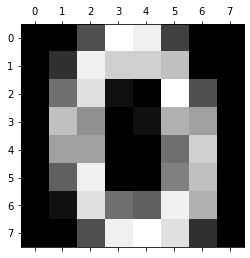

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

n=565
import matplotlib.pyplot as plt 
plt.gray() 
print(digits.target[n])
plt.matshow(digits.images[n]) 
plt.show() 

In [8]:
digits.images.shape
# digits.images[0]

(1797, 8, 8)

In [327]:
# X = np.array([[1., 0.], [2., 1.], [0., 0.]])
# y = np.array([0, 1, 2])

randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
y = y[randomize]
# from sklearn.utils import shuffle
# X, y = shuffle(X, y, random_state=0)

In [151]:
import numpy as np
X = np.random.random((80,8))
y = np.random.randint(2,size=(80,1)) #size=(row,col)

In [310]:
X.shape,one_hot_labels.shape

((150, 4), (150, 3))

In [311]:
# Need to be same
len(X),len(y)

(150, 150)

In [25]:
model = Sequential()
model.add(Dense(8, activation='relu',input_shape=(8,8)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adagrad",
              loss='kullback_leibler_divergence',
              metrics=['accuracy'])
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8, 8)              72        
_________________________________________________________________
dense_2 (Dense)              (None, 8, 3)              27        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [27]:
ob=model.fit(digits.images, digits.target, epochs=100, batch_size=8,validation_split=0.1)

ValueError: Error when checking target: expected dense_2 to have 3 dimensions, but got array with shape (1797, 1)

In [243]:
ob.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [244]:
import matplotlib.pyplot as plt

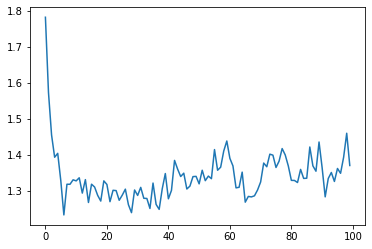

In [258]:
# plt.plot([x for x in range(100)],ob.history["loss"])
plt.plot([x for x in range(100)],ob.history["val_loss"])

In [263]:
scaler=np.array([1])

In [264]:
scaler.shape

(1,)

In [265]:
scaler=np.array([[1,2]])

In [266]:
scaler.shape

(1, 2)

In [277]:
scaler=np.array([[[[1,2,3],[1,2,3]]]])

In [278]:
scaler.shape

(1, 1, 2, 3)

In [274]:
scaler.ndim

3

In [284]:
print(model.input)
print(model.layers)
print(model.output)


Tensor("dense_115_input:0", shape=(?, 4), dtype=float32)
[<keras.layers.core.Dense object at 0x7fd7fc134860>, <keras.layers.core.Dense object at 0x7fd7fc134438>]
Tensor("dense_116/Softmax:0", shape=(?, 3), dtype=float32)


In [285]:
model.get_config()

{'name': 'sequential_54',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_115',
    'trainable': True,
    'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_116',
    'trainable': True,
    'dtype': 'float32',
    'units': 3,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initialize

In [286]:
model.get_weights()

[array([[-0.53152907,  0.47258052, -0.32722643,  0.5948771 ,  0.14059539,
          0.09584343, -0.63499063,  0.11337909],
        [ 0.29460818, -0.0601812 ,  0.20420116,  0.5889261 ,  0.26752388,
          0.03426738, -0.5372305 ,  0.47794977],
        [-0.1873923 ,  0.3057105 , -0.65739846,  0.74675345,  0.5119079 ,
         -0.1143866 , -0.31358182,  0.14618433],
        [-0.2468524 , -0.45982084, -0.38651103, -0.3190412 , -0.47726408,
          0.70877737, -0.23159   ,  0.08490532]], dtype=float32),
 array([ 0.        ,  0.03437625,  0.        , -0.084335  , -0.00687466,
        -0.07576939,  0.        ,  0.08824269], dtype=float32),
 array([[ 0.6522209 ,  0.04527199, -0.7274217 ],
        [ 0.5443608 ,  0.41604066, -0.27075306],
        [-0.7336344 , -0.3785178 , -0.05901378],
        [-0.29871327, -0.7480018 , -0.5560434 ],
        [-0.5168615 ,  0.02611201,  0.61231756],
        [-0.17054716, -0.44425067,  0.29835424],
        [ 0.579076  ,  0.2779078 , -0.5335293 ],
        [-0

In [332]:
def kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

In [331]:
import keras.backend as K

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(8, activation='relu')(inputs)
output_2 = Dense(64, activation='relu')(output_1)
predictions = Dense(3, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(X, y,epochs=50,validation_split=0.2)  # starts training

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 1.0287 - accuracy: 0.5833 - val_loss: 1.5130 - val_accuracy: 0.0000e+00
Epoch 2/50
120/120 [==============================] - 0s 137us/step